# Reinforcement Learning

## Q-learning algorithm

### Frozen lake environment

#### In Frozen Lake, there are 16 tiles, which means our agent can be found in 16 different positions, called states. For each state, there are 4 possible actions: go ◀️LEFT, 🔽DOWN, ▶️RIGHT, and 🔼UP. Learning how to play Frozen Lake is like learning which action you should choose in every state. To know which action is the best in a given state, we would like to assign a quality value to our actions. We have 16 states and 4 actions, so want to calculate 16×4=6416×4=64 values.

#### The problem would be much simpler if we could have intermediate, smaller rewards to guide our path towards the goal G. Alas, this is actually one of the main issues of reinforcement learning: this phenomenon, called sparse rewards, makes agents very difficult to train on problems where the only reward is at the end of a long sequence of actions. 

#### α is the 💡learning rate (between 0 and 1), which is how much we should change the original Q(st,at)Q(st​,at​) value. If α=0, the value never changes, but if α=1, the value changes extremely fast. In our attempt, we didn’t limit the learning rate so α=1. But this is too fast in reality: the reward and the maximum value in the next state quickly overpower the current value. We need to find a balance between the importance of past and new knowledge.

#### γ is the 📉discount factor (between 0 and 1), which determines how much the agent cares about future rewards compared to immediate ones (as the saying goes, “a bird in the hand is worth two in the bush”). If γ=0, the agent only focuses on immediate rewards , but if γ=1, any potential future reward has the same value than current ones.

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


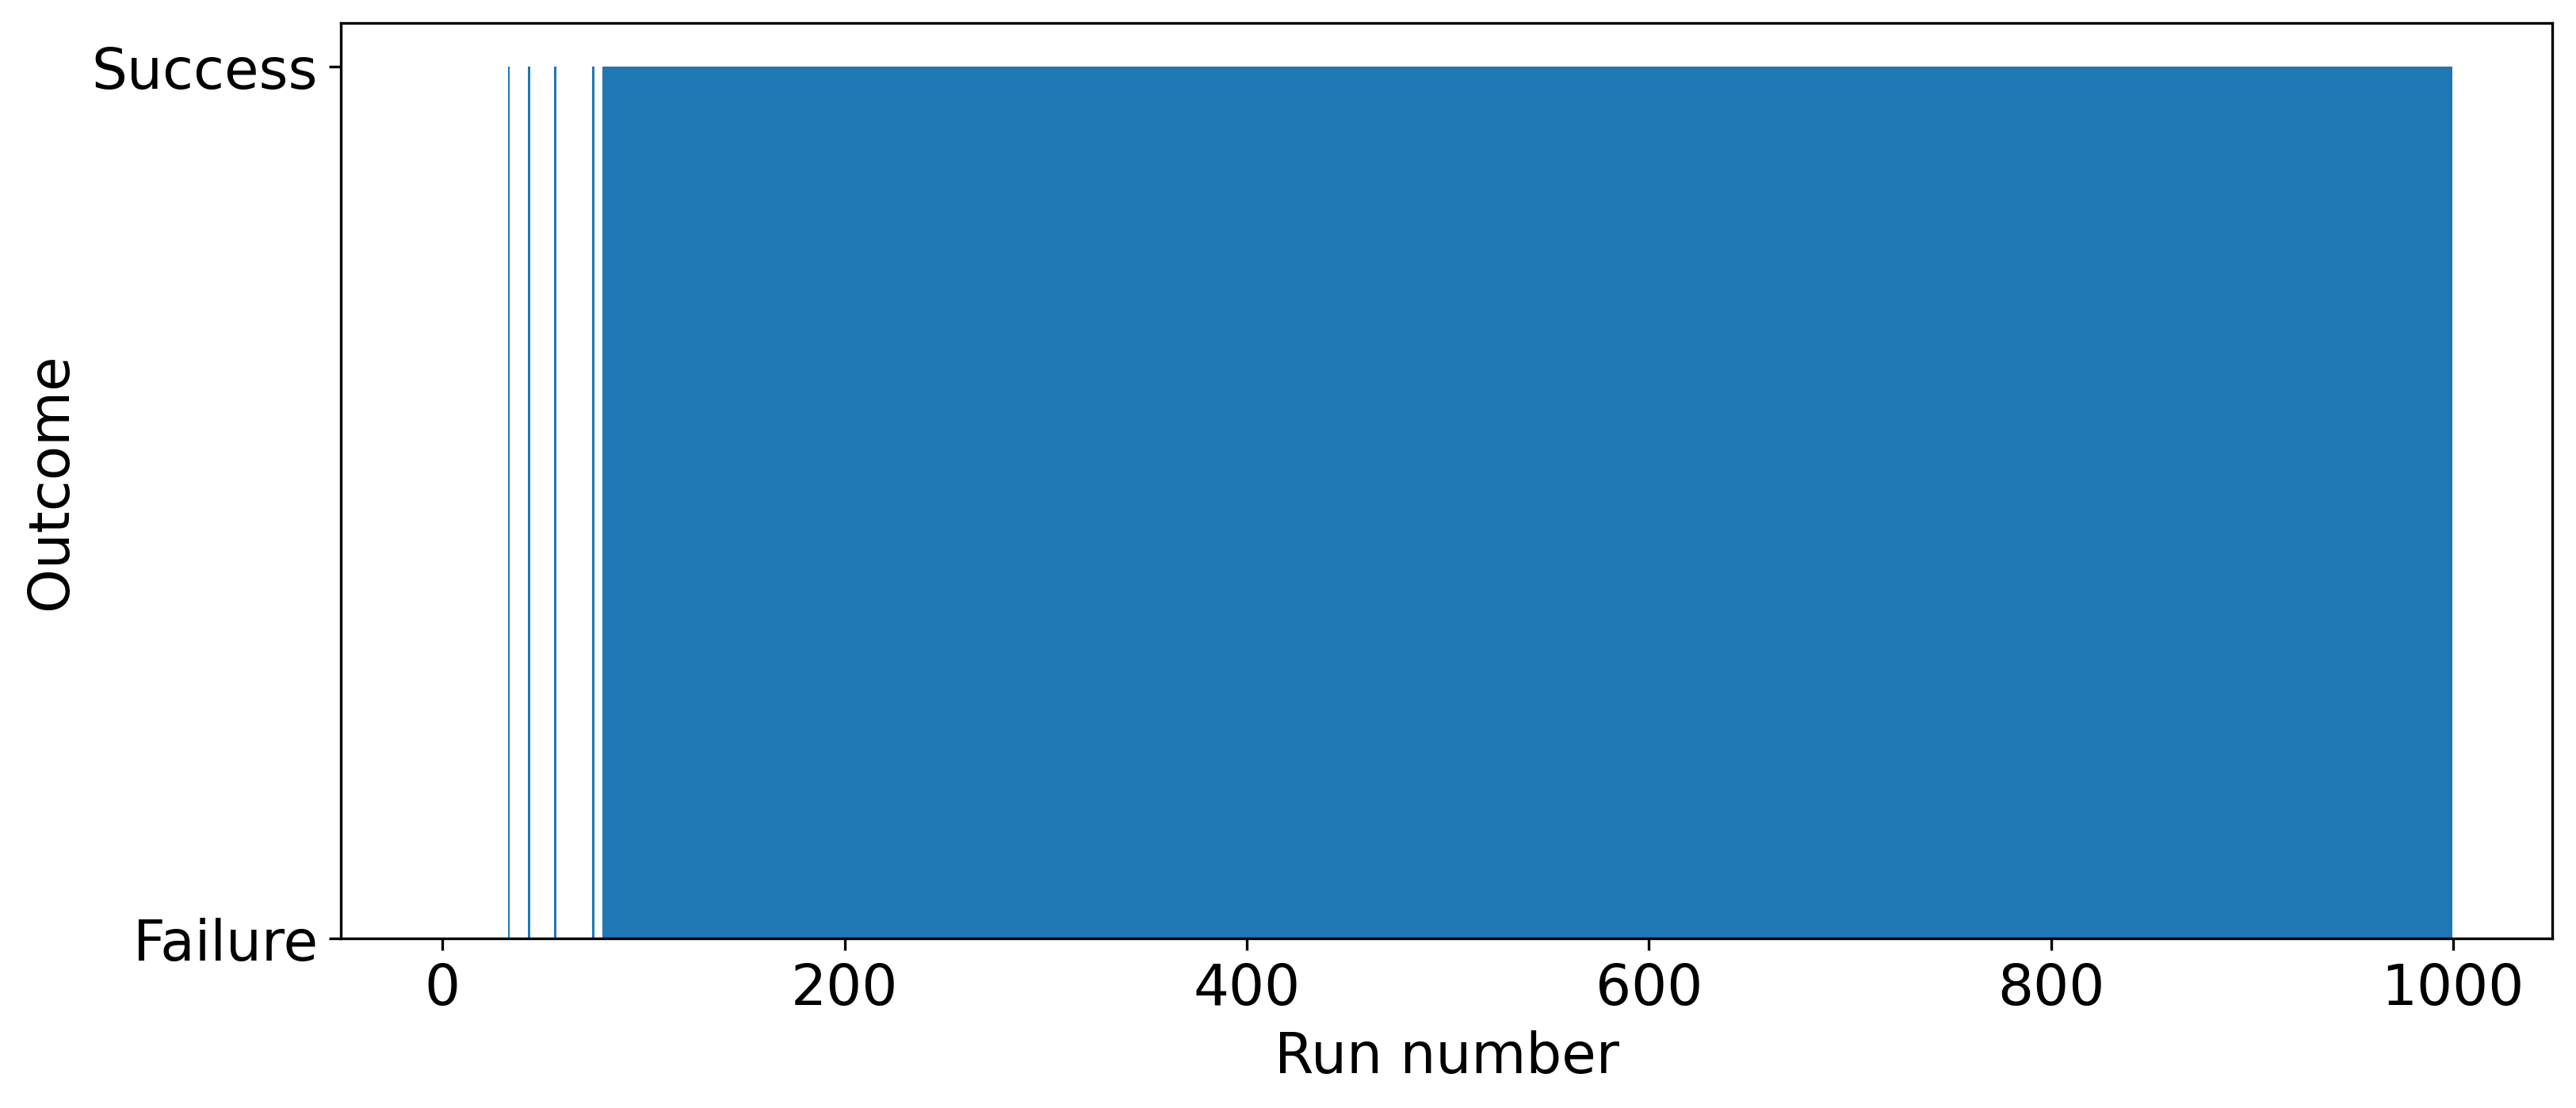

In [12]:
# Import matplotlib to plot the outcomes
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

# Initialize the non-slippery Frozen Lake environment
environment = gym.make("FrozenLake-v1", is_slippery=False)
environment.reset()
environment.render()

plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
            action = environment.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done,_, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [7]:
# print("State:", state, "Type:", type(state))
# print("Q-table shape:", qtable.shape)

State: (0, {'prob': 1}) Type: <class 'tuple'>
Q-table shape: (16, 4)


In [10]:
# step_result = environment.step(action)
# print(step_result)
# print("Number of items returned:", len(step_result))

(0, 0.0, False, False, {'prob': 1.0})
Number of items returned: 5


# epsilon-greedy algorithm

## Take the action with the highest value (exploitation);
## Choose a random action to try to find even better ones (exploration).

### Every time the agent has to take an action, it has a probability εε of choosing a random one, and a probability 1−ε1−ε of choosing the one with the highest value. We can decrease the value of epsilon at the end of each episode by a fixed amount (linear decay), or based on the current value of epsilon (exponential decay).

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441   0.59049    0.4782969  0.531441  ]
 [0.531441   0.         0.43046498 0.47829633]
 [0.47829686 0.46877229 0.28055965 0.33797038]
 [0.40662761 0.         0.28560003 0.03610744]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.42464476]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.72899997]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80995639 0.9        0.72899998]
 [0.81       0.9        1.         0.81      ]
 [0.

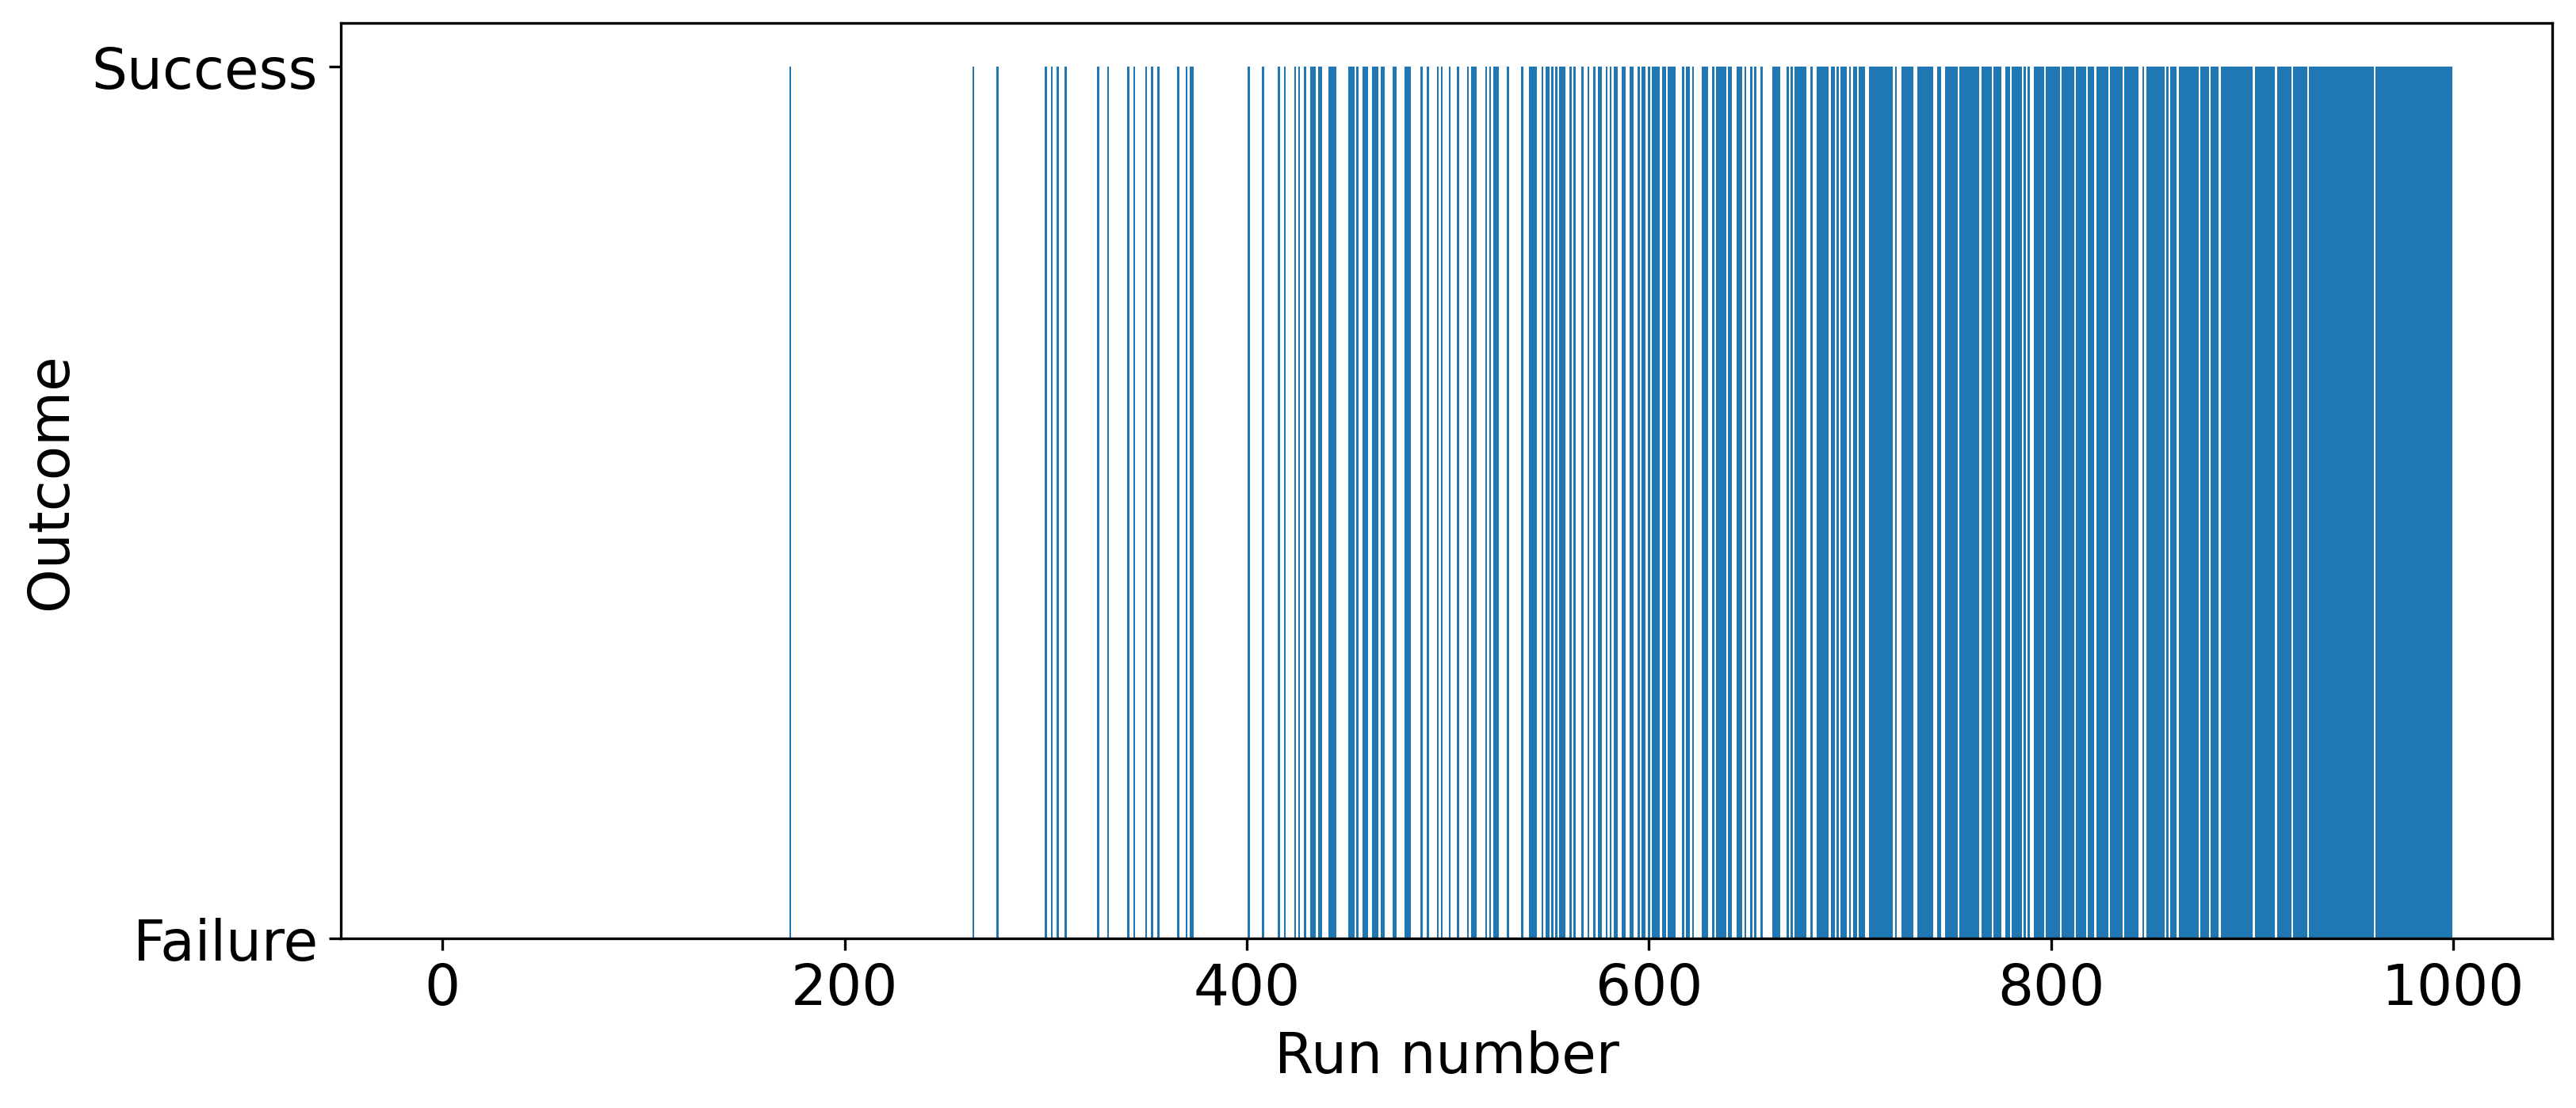

In [15]:
# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
            action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done,_, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

### Model Evaluation

In [17]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done,_, info = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[5.94752492e-02 1.62718309e-02 1.73422795e-02 1.33060427e-02]
 [9.95415261e-03 1.11800614e-02 3.12284872e-03 1.50400100e-02]
 [1.08461497e-02 9.90889625e-03 8.09593870e-03 4.30530291e-03]
 [3.20395576e-03 0.00000000e+00 5.50871537e-04 0.00000000e+00]
 [9.02188198e-02 2.03487904e-02 1.19601118e-02 1.27271754e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.22735114e-03 1.03823463e-01 1.90406349e-03 6.85714044e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.46476467e-02 9.08619498e-03 1.57648107e-02 1.61924189e-01]
 [0.00000000e+00 1.80892697e-01 1.85695994e-02 2.70973114e-02]
 [2.54930813e-01 3.91185264e-03 1.63262193e-02 1.18351154e-02]
 [0.00000000e+00

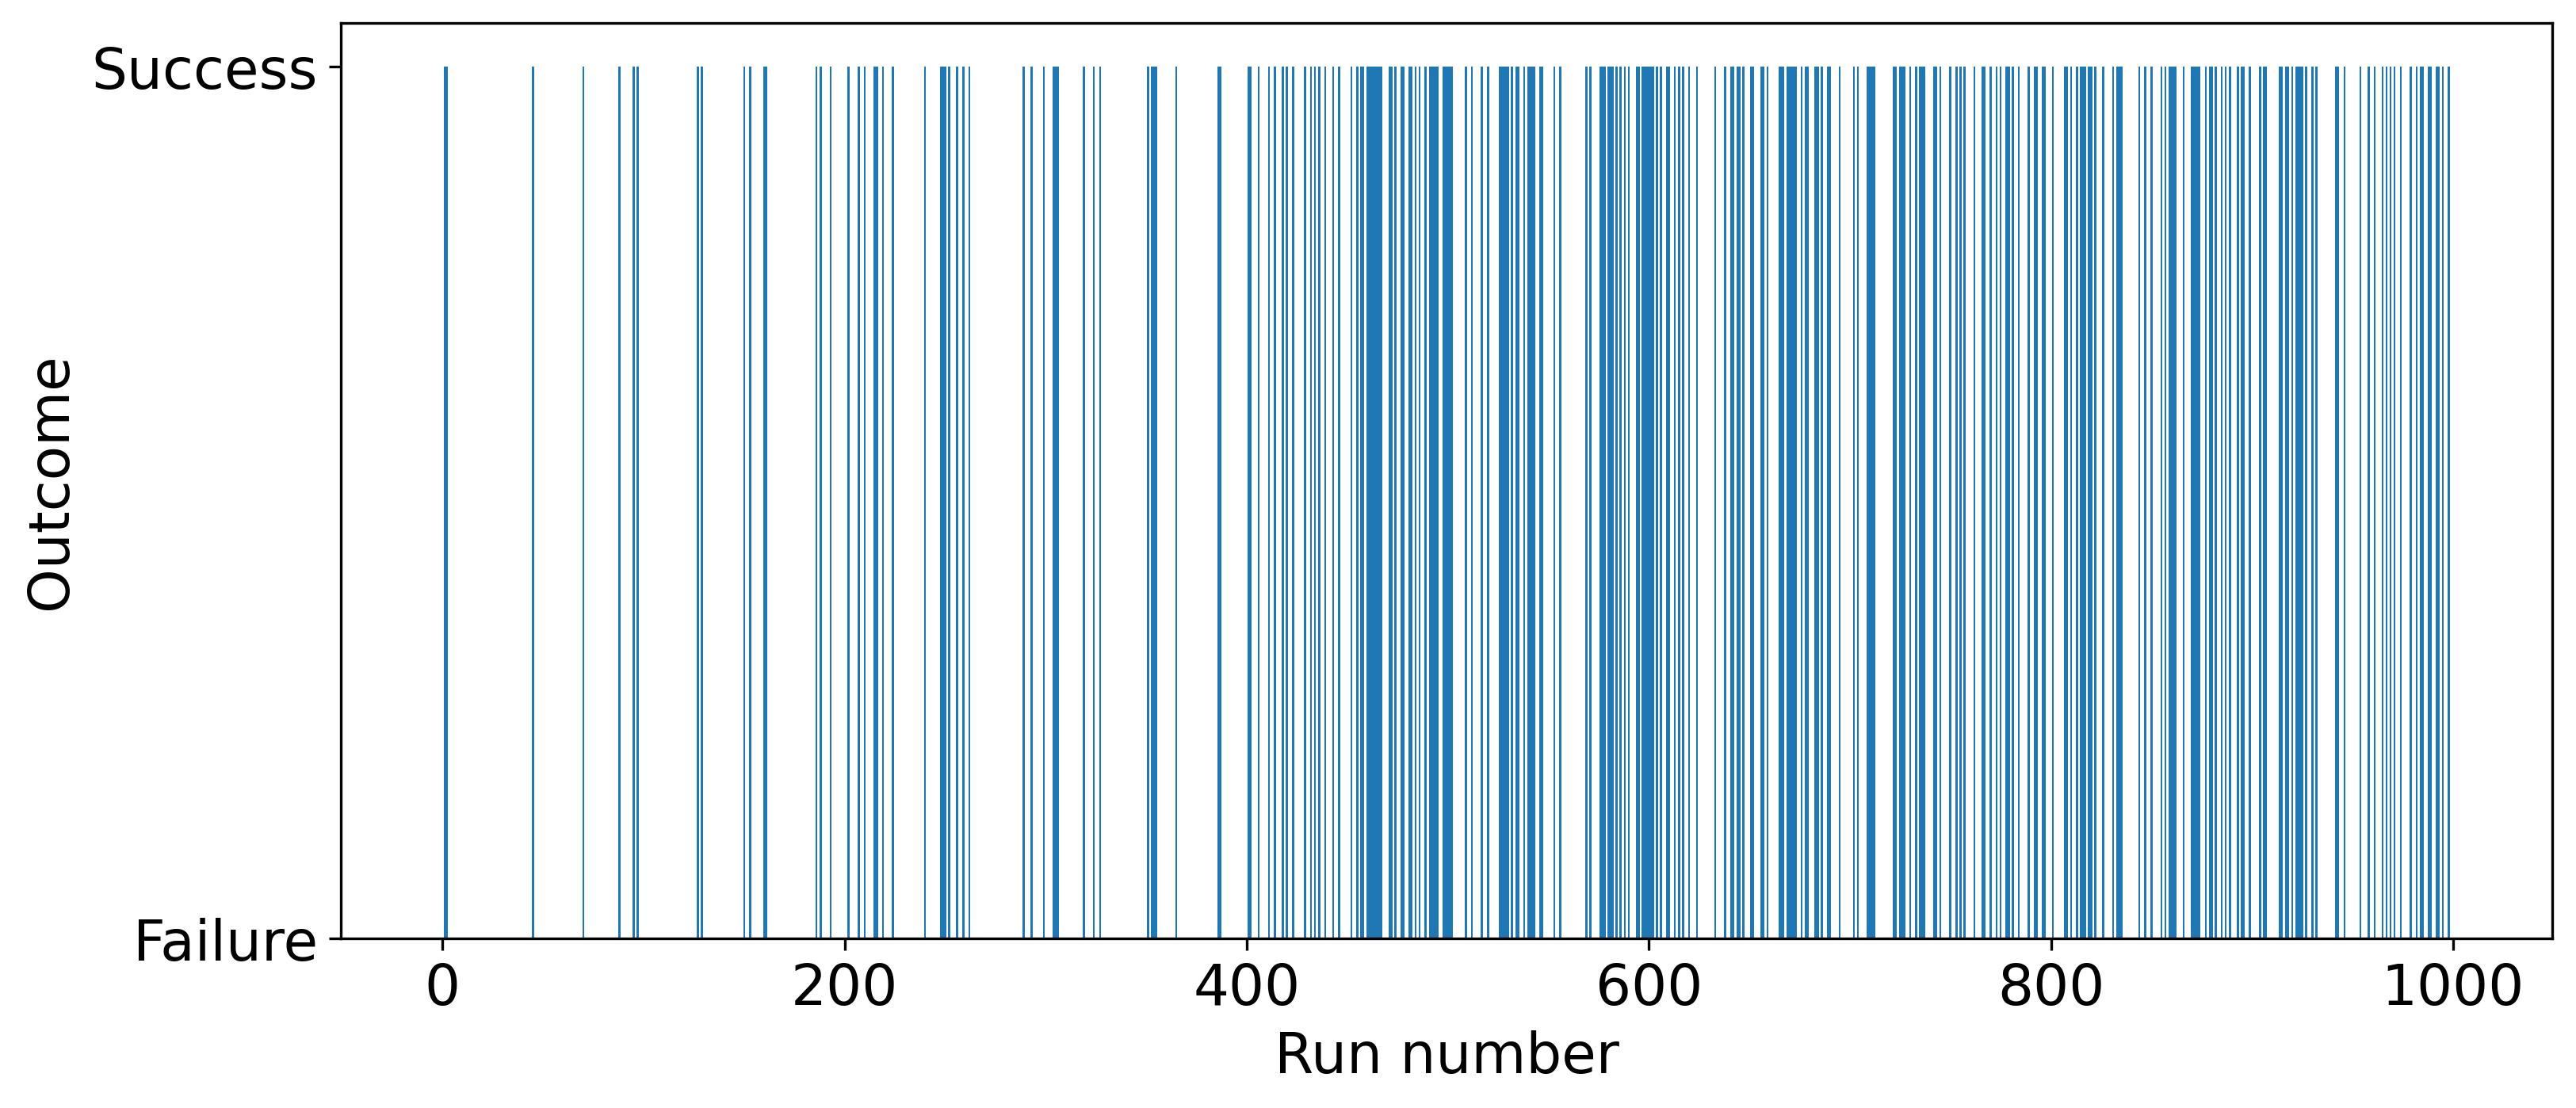

Success rate = 68.0%


In [29]:
# Initialize the slippery Frozen Lake
environment = gym.make("FrozenLake-v1", is_slippery=True)
environment.reset()

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection


# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for episode in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
            action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done,_, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

    # Update epsilon
    epsilon_min = 0.01       # The minimum value epsilon can reach
    decay_rate = 0.01        # Decay rate for exponential decay
    epsilon = epsilon_min + (epsilon - epsilon_min) * np.exp(-decay_rate * episode)


print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done,_, info = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")